Dataset Head:
    Study_Hours  Attendance  Previous_Score  Result
0            7          50              48       0
1            4          60              51       0
2            8          77              92       1
3            5          74              40       0
4            7          99              97       1

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Study_Hours     200 non-null    int64
 1   Attendance      200 non-null    int64
 2   Previous_Score  200 non-null    int64
 3   Result          200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None

Class Distribution:
 Result
0    169
1     31
Name: count, dtype: int64


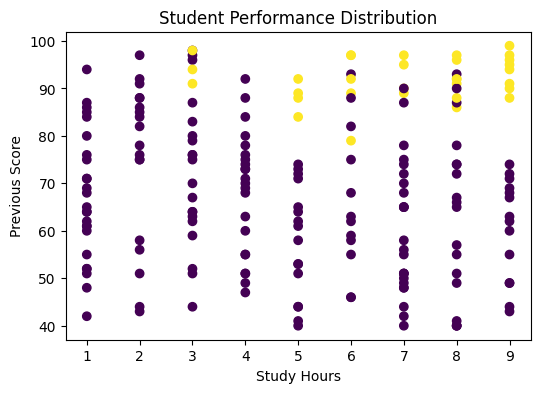


Model Accuracy: 1.0

Confusion Matrix:
 [[37  0]
 [ 0  3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


--- Predict Student Result ---


In [ ]:

# Student Performance Prediction

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Generate Dataset
np.random.seed(42)

data_size = 200

study_hours = np.random.randint(1, 10, data_size)
attendance = np.random.randint(50, 100, data_size)
previous_score = np.random.randint(40, 100, data_size)

# Pass = 1, Fail = 0
result = (study_hours * 2 + attendance * 0.3 + previous_score * 0.5 > 80).astype(int)

# Create DataFrame
df = pd.DataFrame({
    "Study_Hours": study_hours,
    "Attendance": attendance,
    "Previous_Score": previous_score,
    "Result": result
})

# 3. Data Exploration
print("Dataset Head:\n", df.head())
print("\nDataset Info:")
print(df.info())
print("\nClass Distribution:\n", df["Result"].value_counts())

# 4. Visualization
plt.figure(figsize=(6, 4))
plt.scatter(df["Study_Hours"], df["Previous_Score"], c=df["Result"])
plt.xlabel("Study Hours")
plt.ylabel("Previous Score")
plt.title("Student Performance Distribution")
plt.show()

# 5. Feature Selection
X = df[["Study_Hours", "Attendance", "Previous_Score"]]
y = df["Result"]

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 7. Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# 8. Prediction
y_pred = model.predict(X_test)

# 9. Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. User Input Prediction
print("\n--- Predict Student Result ---")
sh = int(input("Enter Study Hours per Day: "))
att = int(input("Enter Attendance Percentage: "))
ps = int(input("Enter Previous Exam Score: "))

prediction = model.predict([[sh, att, ps]])

if prediction[0] == 1:
    print("Prediction: Student will PASS ")
else:
    print("Prediction: Student may FAIL ")